# import libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#import data set

In [6]:
data = pd.read_csv("C:\\Users\\nilka\\OneDrive\\Desktop\\excelr\\self paced course\\project\\Gold_data.csv",date_parser=['date'])
data.head(10)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70
6,2016-01-07,2903.80
7,2016-01-08,2887.80
8,2016-01-09,2813.80
9,2016-01-10,2786.80


# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [8]:
# changing datatype of date column from object to date time
data['date'] =  pd.to_datetime(data['date'])


In [9]:
#setting date column as index
data = data.set_index("date")
data

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [11]:
data['month'] = data.index.month

<AxesSubplot:xlabel='month', ylabel='price'>

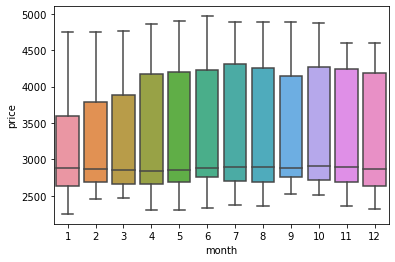

In [12]:
import seaborn as sns
sns.boxplot(x='month',y='price',data=data)

C:\Users\nilka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

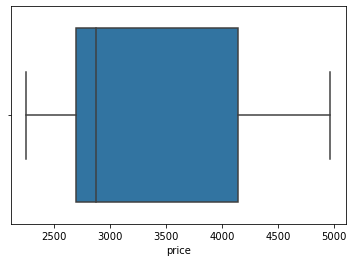

In [13]:
sns.boxplot(data.price)

<AxesSubplot:xlabel='date'>

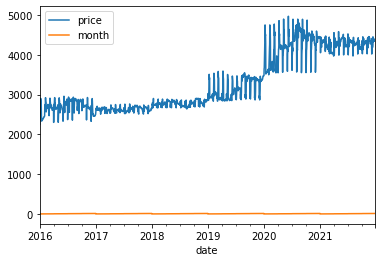

In [14]:
#Line plot 
data.plot()

In [15]:
monthly = data.groupby('date').sum()
monthly

,price,month
date,,
2016-01-01,2252.60,1
2016-01-02,2454.50,1
2016-01-03,2708.10,1
2016-01-04,2577.80,1
2016-01-05,2597.75,1
...,...,...
2021-12-17,4394.40,12
2021-12-18,4389.50,12
2021-12-19,4389.50,12


In [16]:
#Grouping data monthly 
monthly=data.resample(rule='MS').sum()

In [17]:
monthly

,price,month
date,,
2016-01-01,77370.80,31
2016-02-01,77972.40,58
2016-03-01,83168.50,93
2016-04-01,80333.70,120
2016-05-01,83007.15,155
...,...,...
2021-08-01,132212.50,248
2021-09-01,126225.20,270
2021-10-01,132963.60,310


<AxesSubplot:xlabel='date'>

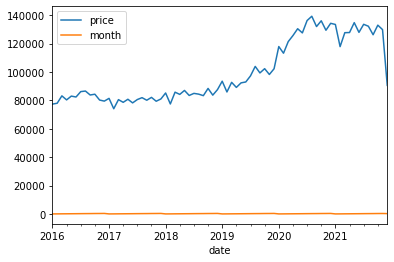

In [18]:
monthly.plot()

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\nilka\AppData\Local\Temp/ipykernel_19508/2225352973.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(monthly.price,model='additive',freq=4).plot();


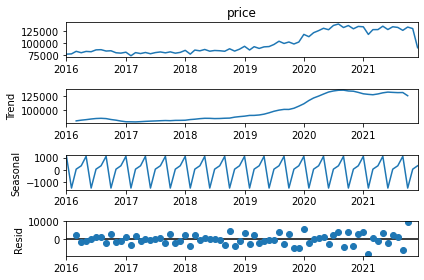

In [20]:
seasonal_decompose(monthly.price,model='additive',freq=4).plot();

### We can clearly see the time series data has an trend and additive seasonality of approximately 4 months i.e 120 days.

In [21]:
#statistical test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['price'])
print("P value = ",dftest[1])

P value =  0.9240899189079188


So from values we can conclude that the time series is not stationary as p>0.05

## DIFFERENCING OTO MAKE DATA STATIONARY

In [22]:
data['price_lag1'] = data['price'] - data['price'].shift(1)

In [23]:
dftest_lag1 = adfuller(data['price_lag1'].dropna())


In [24]:
print("P value = ",dftest_lag1[1])

P value =  0.0


SO with differencing the data has become stationary

<AxesSubplot:xlabel='date'>

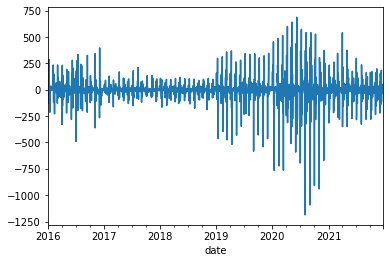

In [25]:
data['price_lag1'].plot()

In [26]:
data['seasonal_diff'] = data['price'] - data['price'].shift(120)

In [27]:
dftest_seasonal_diff = adfuller(data['seasonal_diff'].dropna())

In [28]:
print("P value = ",dftest_lag1[1])

P value =  0.0


<AxesSubplot:xlabel='date'>

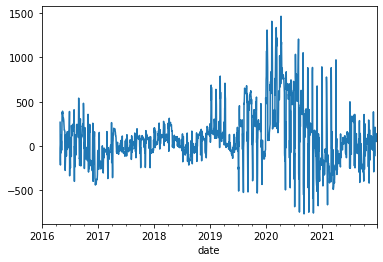

In [29]:
data['seasonal_diff'].plot()

<AxesSubplot:>

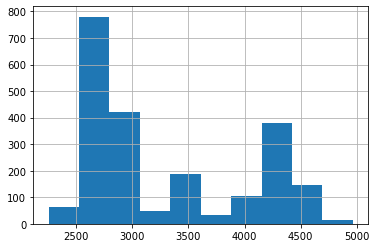

In [30]:
data['price'].hist()

<AxesSubplot:ylabel='Density'>

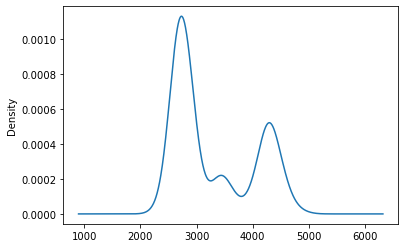

In [31]:
data['price'].plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

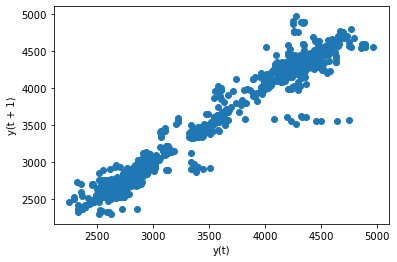

In [32]:
from pandas.plotting import lag_plot
lag_plot(data['price'],lag=1)

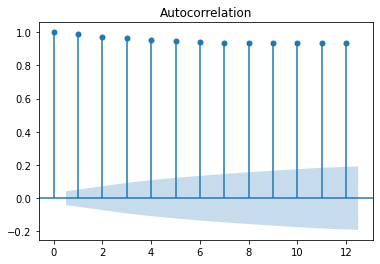

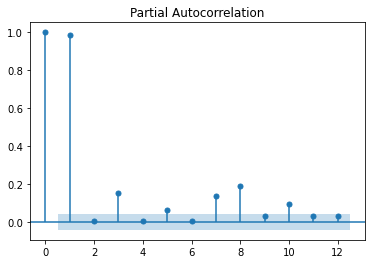

In [33]:
## ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.price,lags=12)
tsa_plots.plot_pacf(data.price,lags=12)
plt.show()

In [34]:
#splitting data into train and test

train = data[:1745]
test = data[1745:]

In [35]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential smoothing

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(train["price"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.price)

C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


5.648719193187324

In [37]:
pred_ses

2020-10-11    4519.808358
2020-10-12    4519.808358
2020-10-13    4519.808358
2020-10-14    4519.808358
2020-10-15    4519.808358
                 ...     
2021-12-17    4519.808358
2021-12-18    4519.808358
2021-12-19    4519.808358
2021-12-20    4519.808358
2021-12-21    4519.808358
Freq: D, Length: 437, dtype: float64

<AxesSubplot:xlabel='date'>

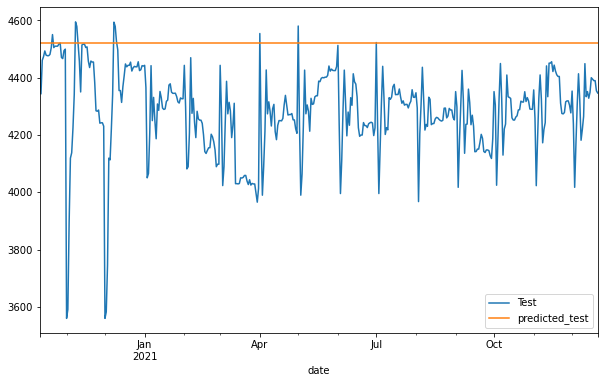

In [38]:
test['price'].plot(legend=True, label='Test',figsize=(10,6))

pred_ses.plot(legend=True, label='predicted_test')

Since Simple Exponential Smoothing only considers Level and donot take trend and seasonality into account ,we get
a level only, which is predicted as 4519.80

SO we cannot use Simple Exponential Smoothing to predict future values with accuracy

# HOLT METHOD

In [39]:
from statsmodels.tsa.holtwinters import Holt
holt_model = Holt(train["price"]).fit()
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.price)

C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


22.5214097467434

In [40]:
pred_holt

2020-10-11    4524.343637
2020-10-12    4527.639493
2020-10-13    4530.935349
2020-10-14    4534.231204
2020-10-15    4537.527060
                 ...     
2021-12-17    5948.153287
2021-12-18    5951.449143
2021-12-19    5954.744998
2021-12-20    5958.040854
2021-12-21    5961.336710
Freq: D, Length: 437, dtype: float64

<AxesSubplot:xlabel='date'>

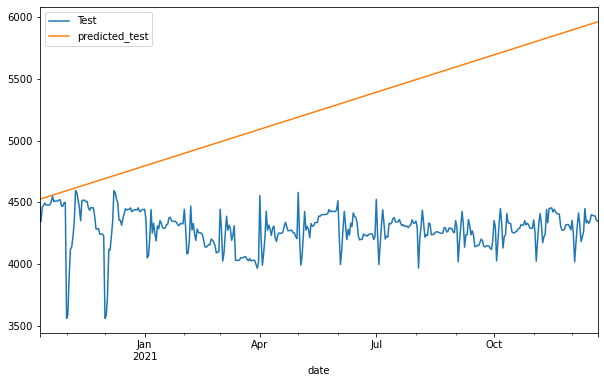

In [41]:
test['price'].plot(legend=True, label='Test',figsize=(10,6))

pred_holt.plot(legend=True, label='predicted_test')

SO as HOLT model only considers Trend and level , we see from the graph that the level considered is same as
SES model and a trend is added to it. But since it does not take into account the seasonality in time series 
we cannot use it to forecast future values since our data has seasonality.

# Holt winter model

In [42]:
train = data[:1745]
test = data[1745:]

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
hwmodel=ExponentialSmoothing(train.price,trend=None, seasonal='add', seasonal_periods=120).fit()

C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [45]:
test_pred=hwmodel.forecast(437)

C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [46]:
test_pred

2020-10-11    4560.477663
2020-10-12    4592.489890
2020-10-13    4616.344126
2020-10-14    4648.683033
2020-10-15    4663.521649
                 ...     
2021-12-17    4377.983189
2021-12-18    4330.640679
2021-12-19    4253.077976
2021-12-20    4253.365987
2021-12-21    4268.349705
Freq: D, Length: 437, dtype: float64

<AxesSubplot:xlabel='date'>

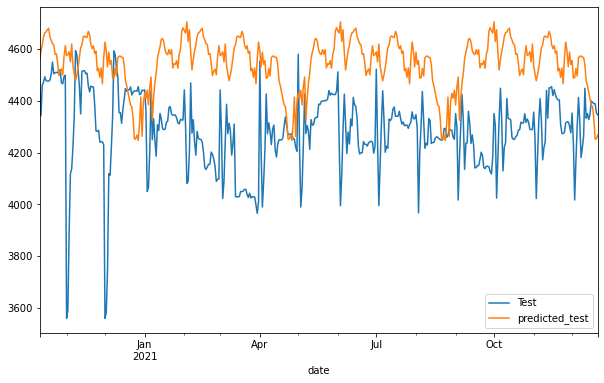

In [47]:

test['price'].plot(legend=True, label='Test',figsize=(10,6))

test_pred.plot(legend=True, label='predicted_test')

We see the Holt Winter model is capturing the level ,trend ad seasonality. So this model can be used to forecast for
future time periods.

# model evaluation

In [48]:
from sklearn.metrics import mean_squared_error

data.price.mean(), np.sqrt(data.price.var())

(3284.4500458295115, 719.5644343413472)

In [49]:
np.sqrt(mean_squared_error(test.price,test_pred))

317.66181482255524

In [50]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [51]:
MAPE(test_pred,test.price)

6.440605338645045

<AxesSubplot:xlabel='date'>

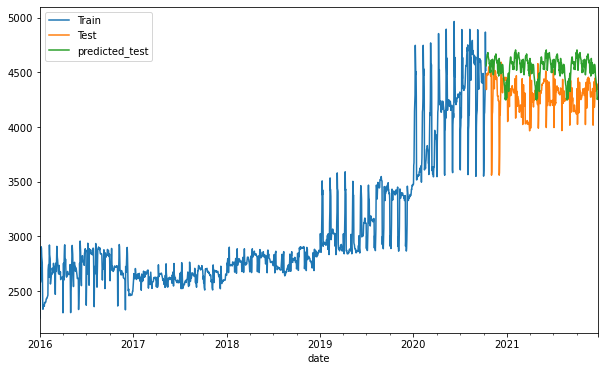

In [52]:


train['price'].plot(legend=True, label='Train',figsize=(10,6))

test['price'].plot(legend=True, label='Test',figsize=(10,6))

test_pred.plot(legend=True, label='predicted_test')

# Final Model

In [53]:
final_model=ExponentialSmoothing(data.price,trend=None, seasonal='add', seasonal_periods=120).fit()

C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [54]:
pred=final_model.forecast(30)

C:\Users\nilka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [55]:
pred

2021-12-22    4340.961833
2021-12-23    4364.836401
2021-12-24    4470.976278
2021-12-25    4385.731746
2021-12-26    4425.515841
2021-12-27    4524.155997
2021-12-28    4424.811661
2021-12-29    4383.250211
2021-12-30    4403.278203
2021-12-31    4453.861083
2022-01-01    4516.875616
2022-01-02    4400.380263
2022-01-03    4437.636107
2022-01-04    4492.231708
2022-01-05    4511.207738
2022-01-06    4617.424217
2022-01-07    4691.542127
2022-01-08    4716.906042
2022-01-09    4762.790292
2022-01-10    4743.094674
2022-01-11    4728.232053
2022-01-12    4730.003215
2022-01-13    4691.183303
2022-01-14    4650.588403
2022-01-15    4660.727066
2022-01-16    4647.365597
2022-01-17    4653.327356
2022-01-18    4626.092177
2022-01-19    4625.754967
2022-01-20    4631.341806
Freq: D, dtype: float64

<AxesSubplot:xlabel='date'>

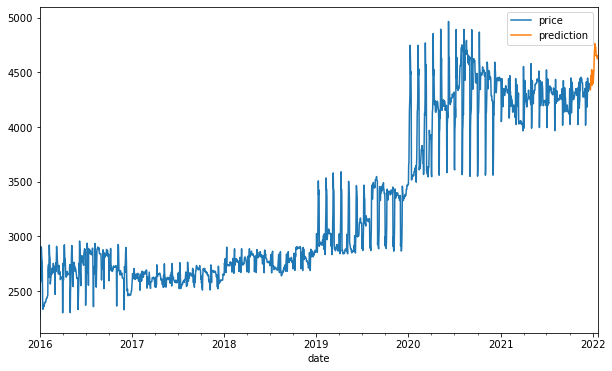

In [56]:
data['price'].plot(legend=True, label='price', figsize=(10,6))
pred.plot(legend=True, label='prediction')

# ARIMA MODEL

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
model =ARIMA(train.price,order=(1,1,2)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                 1744
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -10652.816
Method:                       css-mle   S.D. of innovations            108.748
Date:                Fri, 29 Apr 2022   AIC                          21315.632
Time:                        10:34:15   BIC                          21342.952
Sample:                    01-02-2016   HQIC                         21325.733
                         - 10-10-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0968      0.358      3.062      0.002       0.395       1.799
ar.L1.D.price     0.7399      0.023     31.525      0.000       0.694       0.786
ma.L1.D.price    -0.8217      0.034    -24.160      0.000      -0.888      -0.755
ma.L2.D.price    -0.1431      0.032     -4.532      0.000      -0.205      -0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3515           +0.0000j            1.3515            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
MA.2           -6.7745           +0.0000j            6.7745            0.5000
-----------------------------------------------------------------------------
"""

In [65]:
pred= model.predict(start=1745,end=2181)

In [66]:
pred

2020-10-11   -20.821205
2020-10-12   -16.369890
2020-10-13   -11.827367
2020-10-14    -8.466210
2020-10-15    -5.979183
                ...    
2021-12-17     1.096765
2021-12-18     1.096765
2021-12-19     1.096765
2021-12-20     1.096765
2021-12-21     1.096765
Freq: D, Length: 437, dtype: float64

In [67]:
#ARIMA cannot be used since it is not accounting for seasonality in the data.

# SARIMA 

<AxesSubplot:xlabel='date'>

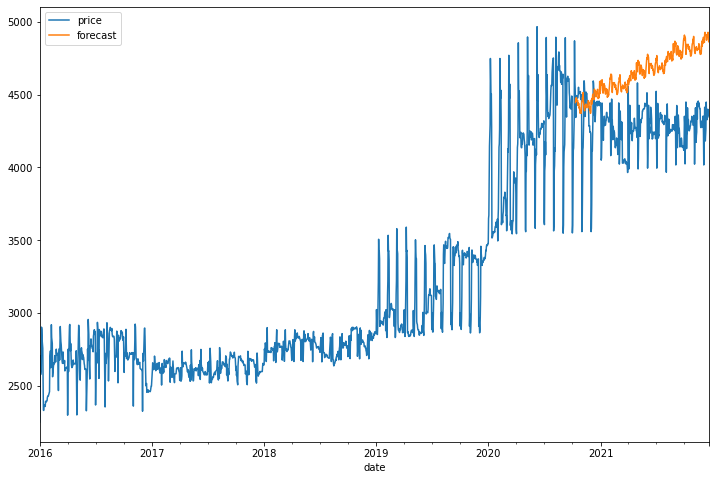

In [68]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['price'],order=(1, 1, 1),seasonal_order=(1,1,1,120))
results=model.fit()
data['forecast']=results.predict(start=1745,end=2181,dynamic=True)
data[['price','forecast']].plot(figsize=(12,8))

In [69]:
MAPE(data['forecast'],test.price)

9.065438967152508

<AxesSubplot:xlabel='date'>

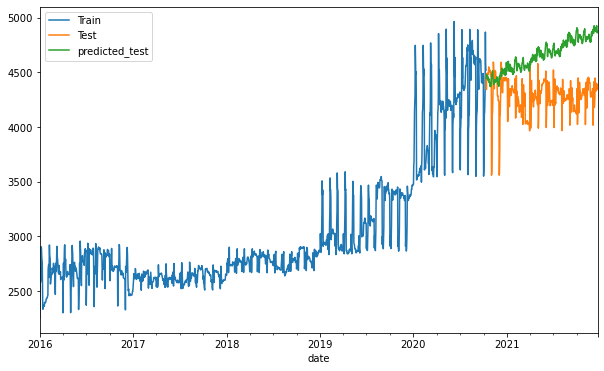

In [70]:
train['price'].plot(legend=True, label='Train',figsize=(10,6))

test['price'].plot(legend=True, label='Test',figsize=(10,6))

data['forecast'].plot(legend=True, label='predicted_test')

<AxesSubplot:>

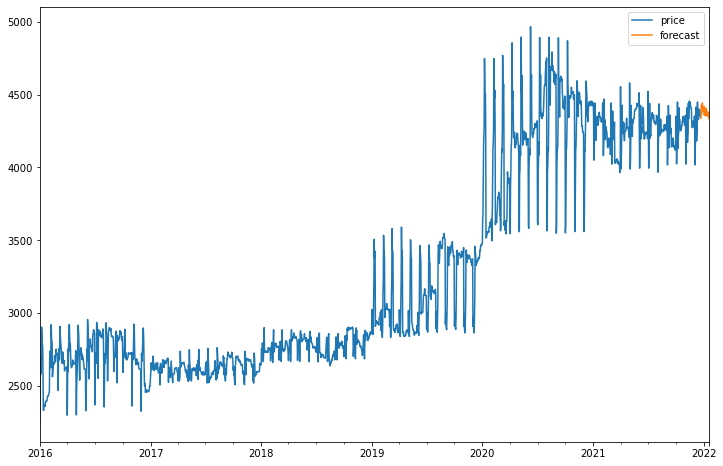

In [71]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(days=x)for x in range(0,30)]
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

future_datest_data.tail()

future_data=pd.concat([data,future_datest_data])

future_data['forecast'] = results.predict(start = 2182, end = 2212, dynamic= True)
future_data[['price', 'forecast']].plot(figsize=(12, 8))


SO AMONG ALL THE MODELS CONSIDERED HOLT-WINTER MODEL AND
SARIMA MODEL ARE GIVING BEST RESULT FOR THE CONSIDERED TIME SERIES.

WE CHOOSE HOLT WINTER MODEL FOR FINAL DEPLOYMENT SINCE AMONG THE TWO MODELS MAPE VALUE FOR HOLT WINTER MODEL IS LOWER


In [3]:
from pickle import dump

In [58]:
dump(final_model,open("hw_finalmodel.sav","wb"))